Code for generating a random graph

In [213]:
import random

def generate_random_graph(num_nodes, num_edges):
    graph = {chr(65 + i): [] for i in range(num_nodes)}
    if num_edges > num_nodes * (num_nodes - 1) // 2:
        print("Warning: Number of edges exceeds maximum possible edges for this number of nodes.")
        num_edges = num_nodes * (num_nodes - 1) // 2

    edges = set()
    keys = list(graph.keys())
    while len(edges) < num_edges:
        u = random.choice(keys)
        v = random.choice(keys)
        if u != v and (u, v) not in edges and (v, u) not in edges:
            edges.add((u, v))
            graph[u].append(v)
            graph[v].append(u)

    return graph

# Comb Tree


Random graph with 10 nodes and 30 edges:
A: ['B', 'G', 'I', 'E', 'D', 'F']
B: ['A', 'I', 'J', 'F', 'G', 'D', 'E']
C: ['D', 'G', 'F', 'J', 'H']
D: ['E', 'C', 'I', 'G', 'B', 'A', 'F']
E: ['D', 'A', 'F', 'J', 'B', 'G']
F: ['E', 'B', 'J', 'H', 'C', 'D', 'A', 'G']
G: ['A', 'D', 'C', 'B', 'E', 'F']
H: ['J', 'I', 'F', 'C']
I: ['B', 'J', 'A', 'D', 'H']
J: ['B', 'I', 'H', 'F', 'E', 'C']
A-B parentright= A-D
A-D parentright= A-E
A-E parentright= A-F
A-F parentright= A-G
A-G parentright= A-I
{'A': {'parentleft': 'A-B', 'parentright': None, 'children': []}, 'A-B': {'parentleft': None, 'parentright': 'A-D', 'children': ['A', 'B']}, 'B': {'parentleft': 'A-B', 'parentright': None, 'children': []}, 'A-D': {'parentleft': None, 'parentright': 'A-E', 'children': ['A-B', 'D']}, 'D': {'parentleft': 'A-D', 'parentright': None, 'children': []}, 'A-E': {'parentleft': None, 'parentright': 'A-F', 'children': ['A-D', 'E']}, 'E': {'parentleft': 'A-E', 'parentright': None, 'children': []}, 'A-F': {'parentleft': No

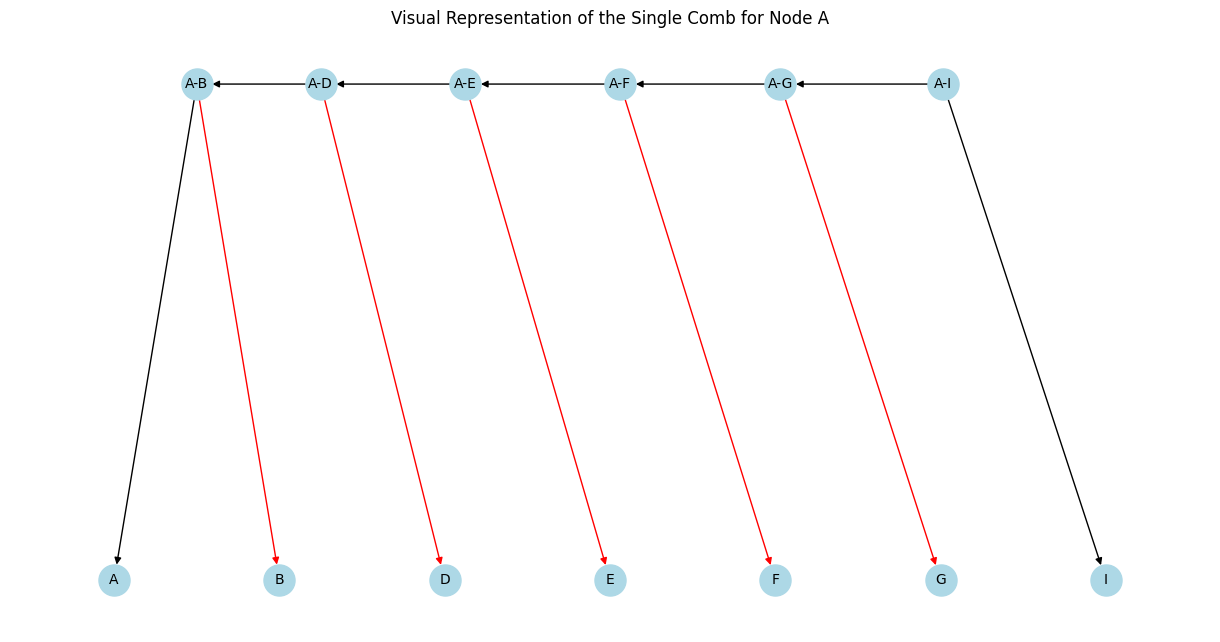

In [218]:

import networkx as nx
import matplotlib.pyplot as plt


def build_single_comb(u, graph):
    Comb = {}
    neighbors = sorted(graph[u])  # Sort for consistent order
    Comb[u] = {'parentleft': None, 'parentright': None, 'children': []}
    last = u
    for v in neighbors:
        edge_key = f"{u}-{v}" if u < v else f"{v}-{u}"
        Comb[edge_key] = {'parentleft': None, 'parentright': None, 'children': []}
        if last == u:
            Comb[last]['parentleft'] = edge_key
        else:
          if '-' in last:
            print(last,'parentright=',edge_key)
            Comb[last]['parentright'] = edge_key
        Comb[edge_key]['children'].append(last)
        if v not in Comb:
            Comb[v] = {'parentleft': None, 'parentright': None, 'children': []}
        Comb[v]['parentleft'] = edge_key
        Comb[edge_key]['children'].append(v)
        last = edge_key
    return Comb

def visualize_comb(u, Comb, graph):
    DG = nx.DiGraph()
    for node in Comb:
        DG.add_node(node)
    edge_colors = []
    for node, data in Comb.items():
        if data['parentleft'] is not None:
            parent = data['parentleft']
            DG.add_edge(parent, node)
            edge_colors.append('black')
        if data['parentright'] is not None:
            parent = data['parentright']
            DG.add_edge(parent, node)
            edge_colors.append('red')

    # Positions: original nodes at bottom (y=0), edge nodes at y=1
    neighbors = sorted(graph[u])
    pos = {}
    pos[u] = (0, 0)
    for i, v in enumerate(neighbors):
        pos[v] = (2 * (i + 1), 0)  # Space out horizontally

    # Get the chain of edge nodes left to right
    chain = []
    curr = Comb[u]['parentleft']
    while curr is not None:
        chain.append(curr)
        curr = Comb[curr]['parentright']

    # Position edge nodes at y=1, using midpoints iteratively
    for i, edge in enumerate(chain):
        if i == 0:
            previous_pos = pos[u][0]
        else:
            previous_pos = pos[chain[i-1]][0]
        # Find v for this edge
        children = Comb[edge]['children']
        previous = u if i == 0 else chain[i-1]
        v = next(c for c in children if c != previous)
        v_pos = pos[v][0]
        mid_x = (previous_pos + v_pos) / 2
        pos[edge] = (mid_x, 1)

    plt.figure(figsize=(12, 6))
    nx.draw(DG, pos, with_labels=True, node_color='lightblue', edge_color=edge_colors, node_size=500, font_size=10, arrows=True)
    plt.title(f"Visual Representation of the Single Comb for Node {u}")
    plt.show()

# Example usage
random.seed(42)  # For reproducibility
num_nodes = 10
num_edges = 30
random_graph = generate_random_graph(num_nodes, num_edges)

# Print the graph for reference
print(f"Random graph with {num_nodes} nodes and {num_edges} edges:")
for node, neighbors in random_graph.items():
    print(f"{node}: {neighbors}")

# Build and visualize single comb for node 'A'
comb = build_single_comb('A', random_graph)
print(comb)
visualize_comb('A', comb, random_graph)

Code for comb Forest generation 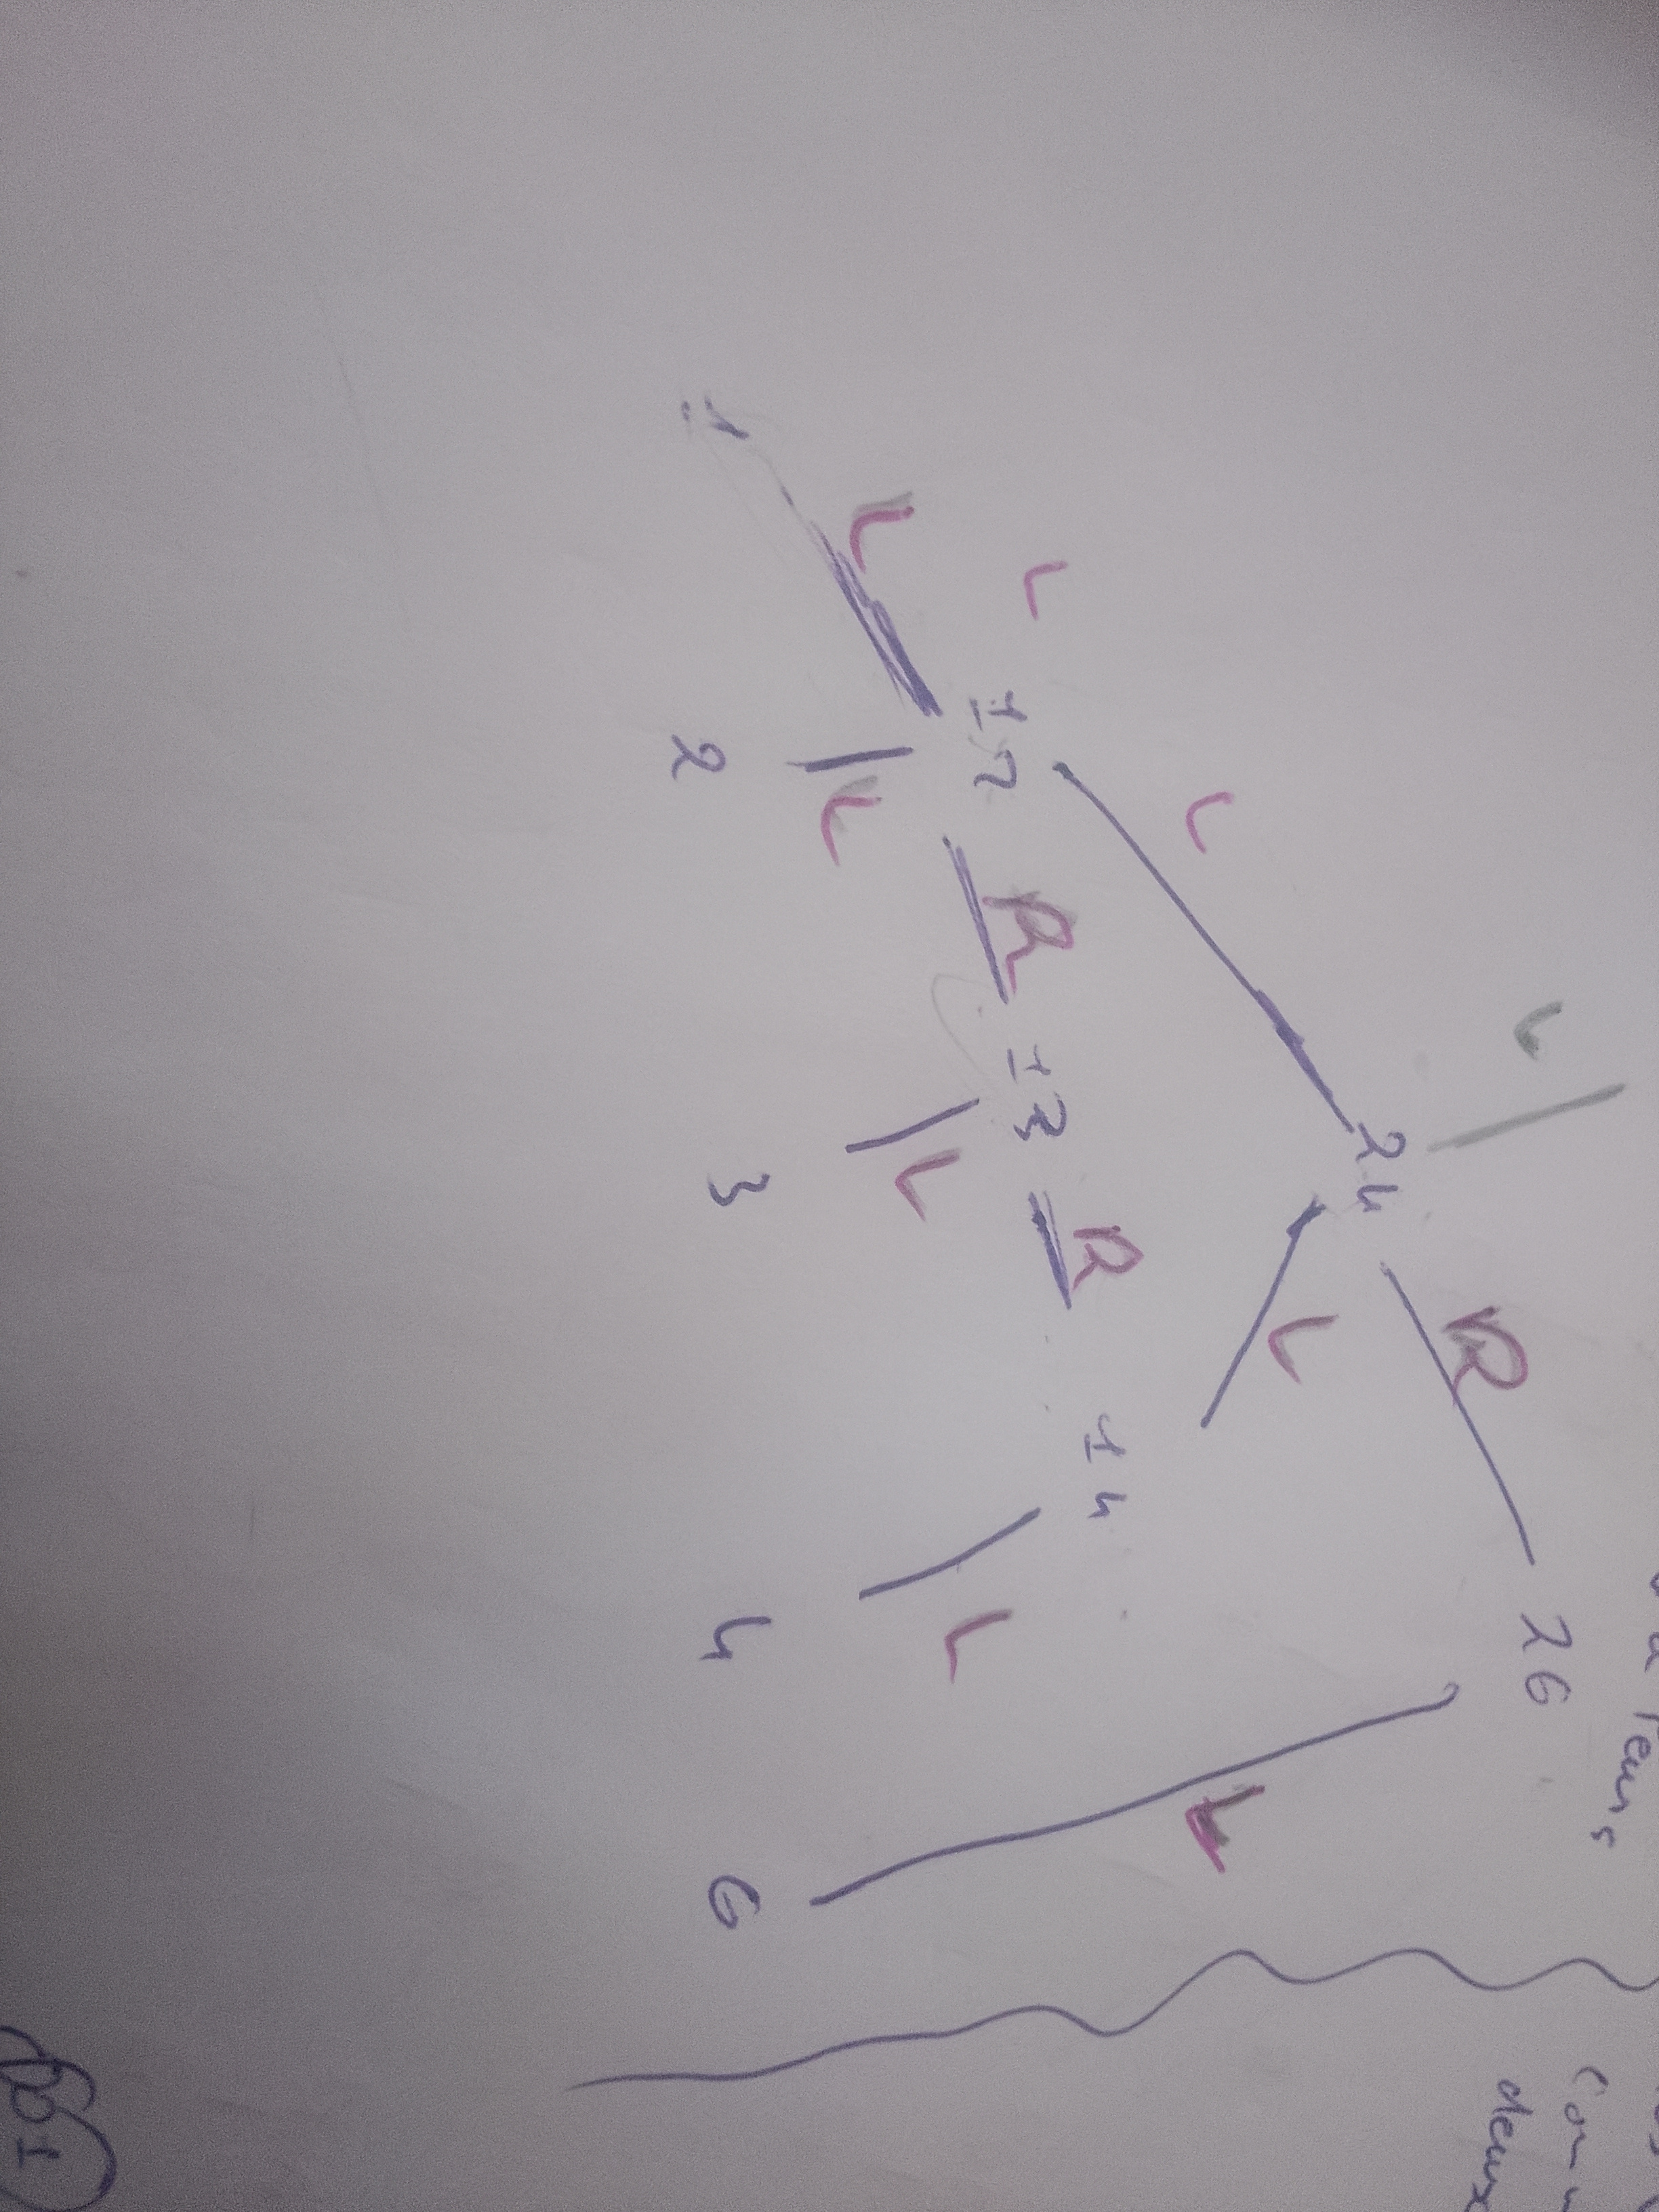


In [215]:


def find_left_end(curr, CombForest):
    # ascend left to the leftmost node (stop when parentleft is None)
    while CombForest[curr]['parentleft'] is not None:
        curr = CombForest[curr]['parentleft']
    return curr

def find_right_end(curr, CombForest):
    while CombForest[curr]['parentright'] is not None:
        curr = CombForest[curr]['parentright']
    return curr

# --- Example random graph ---
num_nodes = 10
num_edges = 30
random_graph = generate_random_graph(num_nodes, num_edges)

print(f"Random graph with {num_nodes} nodes and {num_edges} edges:")
for node, neighbors in random_graph.items():
    print(f"{node}: {neighbors}")

# --- Comb forest construction (no extra front nodes, only u-v keys) ---
processed_edges = set()
CombForest = {}
last_attach = {}   # current attach point for each original node u
prev_u = None      # oldU

# initialize CombForest for original nodes
for n in random_graph.keys():
    CombForest[n] = {'parentleft': None, 'parentright': None, 'children': []}
    last_attach[n] = n

# process each undirected edge only once
for node, neighbors in random_graph.items():
    u = node
    for neighbor in neighbors:
        edge_key = f"{node}-{neighbor}" if node < neighbor else f"{neighbor}-{node}"
        if edge_key in processed_edges:
            continue
        processed_edges.add(edge_key)

        # create the edge node in the CombForest
        CombForest[edge_key] = {'parentleft': None, 'parentright': None, 'children': []}

        v = neighbor

        # ensure v exists (should), then find its leftmost attach
        if v not in CombForest:
            CombForest[v] = {'parentleft': None, 'parentright': None, 'children': []}
            last_attach[v] = v
        attach_v = find_left_end(v, CombForest)  # always ascend left for v

        # get current attach for u (the front)
        if u not in CombForest:
            CombForest[u] = {'parentleft': None, 'parentright': None, 'children': []}
            last_attach[u] = u
        current_attach_u = last_attach[u]

        # If previous u is different, "go left" on u's front by making this edge the parentleft
        print("prev_u",prev_u)
        print("u",u)
        if prev_u != u:
            print(" i got here")
            # make the new edge the left parent of current_attach_u
            current_attach_u = find_left_end(u, CombForest)
            print("current_attach_u",current_attach_u,"=",edge_key)

            CombForest[current_attach_u]['parentleft'] = edge_key
            CombForest[edge_key]['children'].append(current_attach_u)
        else:
            # prev_u is same as u (or None) -> attach the edge to the attach point
            if current_attach_u == u:
                CombForest[current_attach_u]['parentleft'] = edge_key
            else:
                CombForest[current_attach_u]['parentright'] = edge_key
            CombForest[edge_key]['children'].append(current_attach_u)

        # Attach the v-side (always use left ascend result attach_v)

        attach_v = find_left_end(v, CombForest)
        CombForest[attach_v]['parentleft'] = edge_key
        CombForest[edge_key]['children'].append(attach_v)

        # After attaching, the edge becomes the new attach point on u's front
        last_attach[u] = edge_key

        # update prev_u
        prev_u = u




# finished, print summary
print("\nCombForest (summary):")
for k, v in CombForest.items():
    print(f"{k}: {v}")



Random graph with 10 nodes and 30 edges:
A: ['B', 'E', 'I', 'H', 'D', 'F']
B: ['E', 'H', 'A', 'G', 'F', 'I', 'J', 'D']
C: ['H', 'E', 'I', 'F']
D: ['J', 'F', 'I', 'E', 'A', 'G', 'B']
E: ['B', 'C', 'I', 'G', 'A', 'D']
F: ['D', 'B', 'C', 'J', 'H', 'A']
G: ['H', 'J', 'B', 'E', 'D']
H: ['G', 'C', 'B', 'I', 'A', 'F']
I: ['D', 'E', 'C', 'H', 'B', 'A', 'J']
J: ['D', 'G', 'F', 'B', 'I']
prev_u None
u A
 i got here
current_attach_u A = A-B
prev_u A
u A
prev_u A
u A
prev_u A
u A
prev_u A
u A
prev_u A
u A
prev_u A
u B
 i got here
current_attach_u A-B = B-E
prev_u B
u B
prev_u B
u B
prev_u B
u B
prev_u B
u B
prev_u B
u B
prev_u B
u B
prev_u B
u C
 i got here
current_attach_u C = C-H
prev_u C
u C
prev_u C
u C
prev_u C
u C
prev_u C
u D
 i got here
current_attach_u B-D = D-J
prev_u D
u D
prev_u D
u D
prev_u D
u D
prev_u D
u D
prev_u D
u E
 i got here
current_attach_u D-E = E-I
prev_u E
u E
prev_u E
u F
 i got here
current_attach_u D-F = F-J
prev_u F
u F
prev_u F
u G
 i got here
current_attach_u E-G = 

# Node Neighbors

In [216]:
def find_neighbors(u, CombForest):
    neighbors = set()
    from collections import deque
    queue = deque([u])
    visited = set()
    while queue:
        curr = queue.popleft()
        if curr in visited:
            continue
        visited.add(curr)
        pl = CombForest[curr]['parentleft']
        if pl is not None and pl not in visited:
            queue.append(pl)
        pr = CombForest[curr]['parentright']
        if pr is not None and pr not in visited:
            queue.append(pr)
        if '-' in curr:
            x, y = curr.split('-')
            if u == x:
                neighbors.add(y)
            elif u == y:
                neighbors.add(x)
    return neighbors


n=find_neighbors('N', CombForest)
print("neighbors",n)

KeyError: 'N'

# Shared neighbors

Using all neighbors then matching

In [ ]:
from re import M
def find_mutual_neighbors(u, v, CombForest):
    def find_neighbors(node, CombForest):
        neighbors = set()
        from collections import deque
        queue = deque([node])
        visited = set()
        while queue:
            curr = queue.popleft()
            if curr in visited:
                continue
            visited.add(curr)
            pl = CombForest[curr]['parentleft']
            if pl is not None and pl not in visited:
                queue.append(pl)
            pr = CombForest[curr]['parentright']
            if pr is not None and pr not in visited:
                queue.append(pr)
            if '-' in curr:
                x, y = curr.split('-')
                if node == x:
                    neighbors.add(y)
                elif node == y:
                    neighbors.add(x)
        return neighbors

    neighbors_u = find_neighbors(u, CombForest)
    neighbors_v = find_neighbors(v, CombForest)
    return neighbors_u.intersection(neighbors_v)
MN=find_mutual_neighbors('M','F',CombForest)
print("mutual neighbors",MN)

# Nouvelle section

# Code for comb forest and graph visualisation Visualisation  ( **Graph is not realy clear for comb forest but when checked it is correct TO BE FIXED**)


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# --- 1) Draw the original graph ---
G = nx.Graph()
for u, neighbors in random_graph.items():
    for v in neighbors:
        if not G.has_edge(u, v):
            G.add_edge(u, v)

plt.figure(figsize=(6, 4))
pos_graph = nx.spring_layout(G, seed=42)
nx.draw(G, pos_graph, with_labels=True, node_color="skyblue", node_size=800, font_size=10, font_weight="bold")
plt.title("Original Graph")
plt.show()
def hierarchy_pos_wide(G, root, x=0, y=0, dx=10, dy=-2, pos=None, level=0):
    """
    Extra-wide hierarchy layout.
    dx: constant horizontal spacing (big value = more spread)
    dy: vertical spacing
    """
    if pos is None:
        pos = {}
    pos[root] = (x, y)
    children = list(G.successors(root))

    if len(children) == 1:
        pos = hierarchy_pos_wide(G, children[0], x, y + dy, dx, dy, pos, level + 1)
    elif len(children) == 2:
        gap = dx  # fixed large horizontal gap
        pos = hierarchy_pos_wide(G, children[0], x - gap, y + dy, dx, dy, pos, level + 1)
        pos = hierarchy_pos_wide(G, children[1], x + gap, y + dy, dx, dy, pos, level + 1)
    return pos



# --- 2) Build the Comb Forest graph ---
CF_graph = nx.DiGraph()
for node, info in CombForest.items():
    if info['parentleft'] is not None:
        CF_graph.add_edge(node, info['parentleft'])
    if info['parentright'] is not None:
        CF_graph.add_edge(node, info['parentright'])

# hierarchy layout
def hierarchy_pos(G, root, x=0, y=0, dx=20, dy=-1, pos=None, level=0):
    if pos is None:
        pos = {}
    pos[root] = (x, y)
    children = list(G.successors(root))
    if len(children) == 1:
        pos = hierarchy_pos(G, children[0], x, y+dy, dx, dy, pos, level+1)
    elif len(children) == 2:
        pos = hierarchy_pos(G, children[0], x - dx/(2**level), y+dy, dx, dy, pos, level+1)
        pos = hierarchy_pos(G, children[1], x + dx/(2**level), y+dy, dx, dy, pos, level+1)
    return pos

# find roots (nodes with no parent in CombForest)
roots = [n for n in CombForest if all(n != CombForest[ch].get('parentleft') and
                                      n != CombForest[ch].get('parentright')
                                      for ch in CombForest)]

# build positions for all roots
pos_all = {}
start_x = 0
for root in roots:
    pos_sub = hierarchy_pos(CF_graph, root, x=start_x)
    pos_all.update(pos_sub)
    start_x += 5  # space between different trees

def forest_pos_wide(G, roots, dx=50, dy=5, x_start=0):
    """
    Get wide layout for a forest.
    roots: list of root nodes for each tree in the forest
    dx: horizontal spacing per tree
    dy: vertical spacing
    """
    pos = {}
    current_x = x_start
    for r in roots:
        sub_pos = hierarchy_pos_wide(G, r, x=current_x, y=0, dx=dx, dy=dy)
        pos.update(sub_pos)
        # Move x for next tree far enough so they don't overlap
        current_x += dx * 4
    return pos


# Example usage:
roots = [n for n in CF_graph.nodes if CF_graph.in_degree(n) == 0]  # forest roots
pos_all = forest_pos_wide(CF_graph, roots, dx=15, dy=-2.5)

plt.figure(figsize=(30, 20))
nx.draw(CF_graph, pos_all, with_labels=True,
        node_color="lightgreen", node_size=1500,
        font_size=10, font_weight="bold", arrows=True)
plt.show()

